In [2]:
import warnings
warnings.filterwarnings('ignore')


# 0. Data Science 101



An journey through data wrangling, visualization and modeling with some real world data.


## All too common question: Where do I start?


##Should I get a graduate degree in Statistics or Machine Learning?

#NO


## The world's data science problems will never be solved by this approach

##You are what you repeatedly do/practice.

##Mindset is more important than any particular technique


## Most important tools: 

##Curiosity, Patience, Common Sense, Healthy Skepticism


## Let's go on a first pass through a dataset, with a focus on exploration.


In [3]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


#1. Meet the data
- 2015 NFL Regular Season Fanduel data
- Dataset contains a row for each player in the league, for each week
- Several Categorical variables (full_name, team, week, home_team, away_team)
- Several Numeric lag variables (mean_passing_att across all prior weeks, prev_passing_att for one prior week)

In [4]:
raw_df = pd.read_csv("/home/brianb/Downloads/odsc_football_modeling_data_2.csv")
df_no_week_1 = raw_df[raw_df.week > 1]

#What columns do we have?


In [5]:
ff_cols = raw_df.columns
sort(ff_cols.values)

array(['away_team', 'fanduel_points', 'full_name', 'home_team',
       'mean_fanduel_points', 'mean_fumbles_lost', 'mean_fumbles_tot',
       'mean_passing_att', 'mean_passing_cmp', 'mean_passing_cmp_air_yds',
       'mean_passing_incmp', 'mean_passing_incmp_air_yds',
       'mean_passing_int', 'mean_passing_sk', 'mean_passing_sk_yds',
       'mean_passing_tds', 'mean_passing_yds', 'mean_receiving_rec',
       'mean_receiving_tar', 'mean_receiving_tds',
       'mean_receiving_yac_yds', 'mean_receiving_yds', 'mean_rushing_att',
       'mean_rushing_loss', 'mean_rushing_loss_yds', 'mean_rushing_tds',
       'mean_rushing_yds', 'opponent', 'player_id', 'position',
       'prev_fanduel_points', 'prev_fumbles_lost', 'prev_fumbles_tot',
       'prev_passing_att', 'prev_passing_cmp', 'prev_passing_cmp_air_yds',
       'prev_passing_incmp', 'prev_passing_incmp_air_yds',
       'prev_passing_int', 'prev_passing_sk', 'prev_passing_sk_yds',
       'prev_passing_tds', 'prev_passing_yds', 'prev_rec

#A quick look at our data

In [6]:
raw_df[ff_cols].head()

,player_id,full_name,position,team,week,fanduel_points,opponent,home_team,away_team,prev_fanduel_points,...,prev_rushing_att,mean_rushing_att,prev_rushing_loss,mean_rushing_loss,prev_rushing_loss_yds,mean_rushing_loss_yds,prev_rushing_tds,mean_rushing_tds,prev_rushing_yds,mean_rushing_yds
0,00-0019596,Tom Brady,QB,NE,1,27.62,PIT,NE,PIT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00-0020712,James Harrison,OLB,PIT,1,0.00,NE,NE,PIT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00-0022874,Josh Scobee,K,NO,1,8.00,PIT,NE,PIT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00-0022900,Will Allen,UNK,UNK,1,0.00,PIT,NE,PIT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00-0022924,Ben Roethlisberger,QB,PIT,1,17.04,NE,NE,PIT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_no_week_1[ff_cols].head()

,player_id,full_name,position,team,week,fanduel_points,opponent,home_team,away_team,prev_fanduel_points,...,prev_rushing_att,mean_rushing_att,prev_rushing_loss,mean_rushing_loss,prev_rushing_loss_yds,mean_rushing_loss_yds,prev_rushing_tds,mean_rushing_tds,prev_rushing_yds,mean_rushing_yds
1021,00-0010346,Peyton Manning,UNK,UNK,2,21.24,DEN,KC,DEN,5.90,...,1,1,0,0,0,0,0,0,-1,-1
1022,00-0022793,Antonio Smith,UNK,UNK,2,0.00,DEN,KC,DEN,0.00,...,0,0,0,0,0,0,0,0,0,0
1023,00-0023436,Alex Smith,QB,KC,2,7.14,DEN,KC,DEN,23.22,...,9,9,0,0,0,0,0,0,15,15
1024,00-0023445,DeMarcus Ware,OLB,DEN,2,0.00,KC,KC,DEN,0.00,...,0,0,0,0,0,0,0,0,0,0
1025,00-0023449,Derrick Johnson,ILB,KC,2,0.00,DEN,KC,DEN,0.00,...,0,0,0,0,0,0,0,0,0,0


###Where do we begin? 

###We know some Python. Let's use that.

###First thing to figure out is how to get the data files on your machine into Python in the first place.



###We can use Pandas.


#Pandas

Pandas is a Python library you may have heard of that is great for exploring data in real time. Let's look at what we already did with Pandas and what else we can do!


#Reading data from disk

In [9]:
raw_df = pd.read_csv("/home/brianb/Downloads/odsc_football_modeling_data_2.csv")

###What did that just do? 



We called "read_csv", which presumably reads CSV files... and does what with them? 

##pd.read_csv does a magical thing 


It reads a CSV file into a DataFrame. 

DataFrames are mystical creatures in Data Science. 

Popularized by R, they provide a standardized matrix-style format for interacting with your data. Most data can fit into this row and column format: financial transactions, iPhone app user records, medical histories, etc.

##Since you were wondering

##Pandas has support for many formats

CSV, Text (tab separated, pipe separated, etc.), Excel, JSON, HTML, SQL, Stuff copied to your clipboard, HDFS...

## Hold up. What's really going on with these DataFrames?

## Two data structures: Series and DataFrame

###Series
Think of this as one column of your data - one data type.

### DataFrame
All of the columns in your data. Mixed data types. 


#Many Series can be combined and represented as a DataFrame object.

#A DataFrame can be represented as many Series objects. 

#Pandas provides tons of functions to:

###slice, dice, merge, join, group by, select, append, find, transform, sort, reverse, pivot and anything else you want to do


#... for both Series and DataFrames. 

Most functions are designed to work with either type or even combinations of the two, just like you would intuitively expect:

i.e. A concat function can contatenate arbitrary combinations of 0 to n Series and DataFrames.

#Accessing data in a DataFrame

###Get one column (Series)

In [10]:
raw_df['full_name'].head()

0             Tom Brady
1        James Harrison
2           Josh Scobee
3            Will Allen
4    Ben Roethlisberger
Name: full_name, dtype: object

###Get subset of columns (DataFrame)

In [11]:
raw_df[['full_name', 'position', 'team']].head()

,full_name,position,team
0,Tom Brady,QB,NE
1,James Harrison,OLB,PIT
2,Josh Scobee,K,NO
3,Will Allen,UNK,UNK
4,Ben Roethlisberger,QB,PIT


###Get a subset of rows using a boolean array

In [13]:
raw_df[raw_df.week > 1].head()

,player_id,full_name,position,team,week,fanduel_points,opponent,home_team,away_team,prev_fanduel_points,...,prev_rushing_att,mean_rushing_att,prev_rushing_loss,mean_rushing_loss,prev_rushing_loss_yds,mean_rushing_loss_yds,prev_rushing_tds,mean_rushing_tds,prev_rushing_yds,mean_rushing_yds
1021,00-0010346,Peyton Manning,UNK,UNK,2,21.24,DEN,KC,DEN,5.90,...,1,1,0,0,0,0,0,0,-1,-1
1022,00-0022793,Antonio Smith,UNK,UNK,2,0.00,DEN,KC,DEN,0.00,...,0,0,0,0,0,0,0,0,0,0
1023,00-0023436,Alex Smith,QB,KC,2,7.14,DEN,KC,DEN,23.22,...,9,9,0,0,0,0,0,0,15,15
1024,00-0023445,DeMarcus Ware,OLB,DEN,2,0.00,KC,KC,DEN,0.00,...,0,0,0,0,0,0,0,0,0,0
1025,00-0023449,Derrick Johnson,ILB,KC,2,0.00,DEN,KC,DEN,0.00,...,0,0,0,0,0,0,0,0,0,0


#So now we know about DataFrames

##...What's next?

# Exploratory Data Analysis

Does it look like test data should? 

Is it completely empty? Full? Lots of missing values and NaNs?

What are in the rows? columns?

Does it have appropriate features? (characteristics common to records belonging to a dataset)

###It's impossible to make good decisions moving forward until we know more

We can just output the entire dataframe to the console, but that doesn't scale beyond a couple hundred rows.

<pre>
In [1]: df = DataFrame(np.random.randn(10, 4))

In [2]: df
Out[2]: 
          0         1         2         3
0  0.469112 -0.282863 -1.509059 -1.135632
1  1.212112 -0.173215  0.119209 -1.044236
2 -0.861849 -2.104569 -0.494929  1.071804
3  0.721555 -0.706771 -1.039575  0.271860
4 -0.424972  0.567020  0.276232 -1.087401
5 -0.673690  0.113648 -1.478427  0.524988
6  0.404705  0.577046 -1.715002 -1.039268
7 -0.370647 -1.157892 -1.344312  0.844885
8  1.075770 -0.109050  1.643563 -1.469388
9  0.357021 -0.674600 -1.776904 -0.968914
</pre>

##Look for missing values

In [16]:
df_no_week_1 = raw_df[raw_df.week > 1]
df_no_week_1.isnull().sum()

player_id                       0
full_name                       0
position                        0
team                            0
week                            0
fanduel_points                  0
opponent                        0
home_team                       0
away_team                       0
prev_fanduel_points           823
mean_fanduel_points           823
prev_fumbles_lost             823
mean_fumbles_lost             823
prev_fumbles_tot              823
mean_fumbles_tot              823
prev_passing_att              823
mean_passing_att              823
prev_passing_cmp              823
mean_passing_cmp              823
prev_passing_cmp_air_yds      823
mean_passing_cmp_air_yds      823
prev_passing_incmp            823
mean_passing_incmp            823
prev_passing_incmp_air_yds    823
mean_passing_incmp_air_yds    823
prev_passing_int              823
mean_passing_int              823
prev_passing_sk               823
mean_passing_sk               823
prev_passing_s

#What about relationships between variables?

##Should we compute covariance?


#Nah, let's make some plots!


#A quick aside.
##IPython Notebooks (like this one) are great.
##Plots in your notebook!

# Two plotting weapons

###Matplotlib

- The historical go-to for plotting
- allows lots of fine-grained control
- built with numpy in mind (Numpy and its cousin Scipy are the number-crunching go-to's in Python)

###Seaborn

- Expressive power
- built with pandas in mind
- trendy newcomer, but gaining a loyal following

We will mainly use seaborn examples in this presentation. It's very intuitive and powerful to use.

#What is the distribution of points earned?

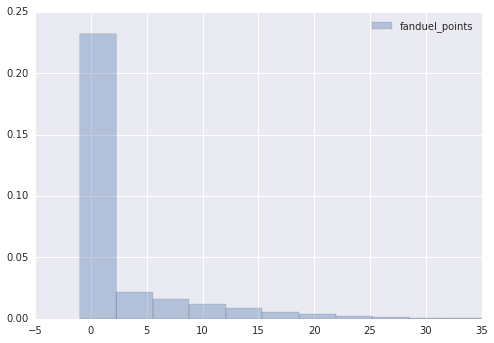

In [10]:
pylab.hist(raw_df['fanduel_points'],
               normed=True,
               bins=np.linspace(-1, 35, 12),
               alpha=0.35,
               label='fanduel_points')
pylab.legend()
pylab.figure(figsize=(15,15))

# Target is skewed --- let's transform it so it's more normal


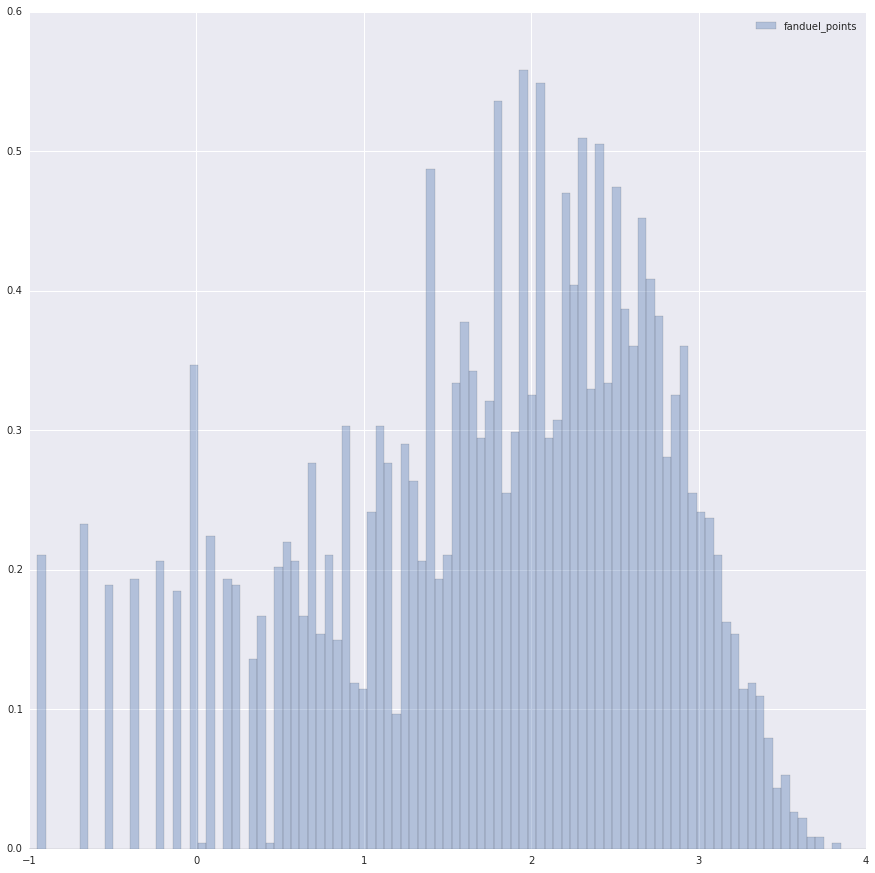

In [11]:
transformed_target = pd.DataFrame.copy(raw_df[raw_df.fanduel_points > 1])
transformed_target['fanduel_points'] = np.log(raw_df[raw_df.fanduel_points > 0]['fanduel_points']-1)
pylab.figure(figsize=(15,15))
pylab.hist(transformed_target['fanduel_points'],
               normed=True,
               bins=np.linspace(-1, 4, 100),
               alpha=0.35,
               label='fanduel_points')
pylab.legend()

# I see lots of zeroes --- Where are these bad performances coming from?



   position  count
24       WR   1822
3        DE   1276
19       RB   1226
1        CB   1161
15      OLB   1139
23       TE    948
2        DB    754
4        DT    724
10       LB    625
21       SS    532
18       QB    509
6        FS    500
9         K    462
17        P    443
8       ILB    414
22        T    332
13       NT    229
12      MLB    210
5        FB    175
7         G    147
0         C    142
14       OG    107
16       OT     94
11       LS     73
20      SAF      1


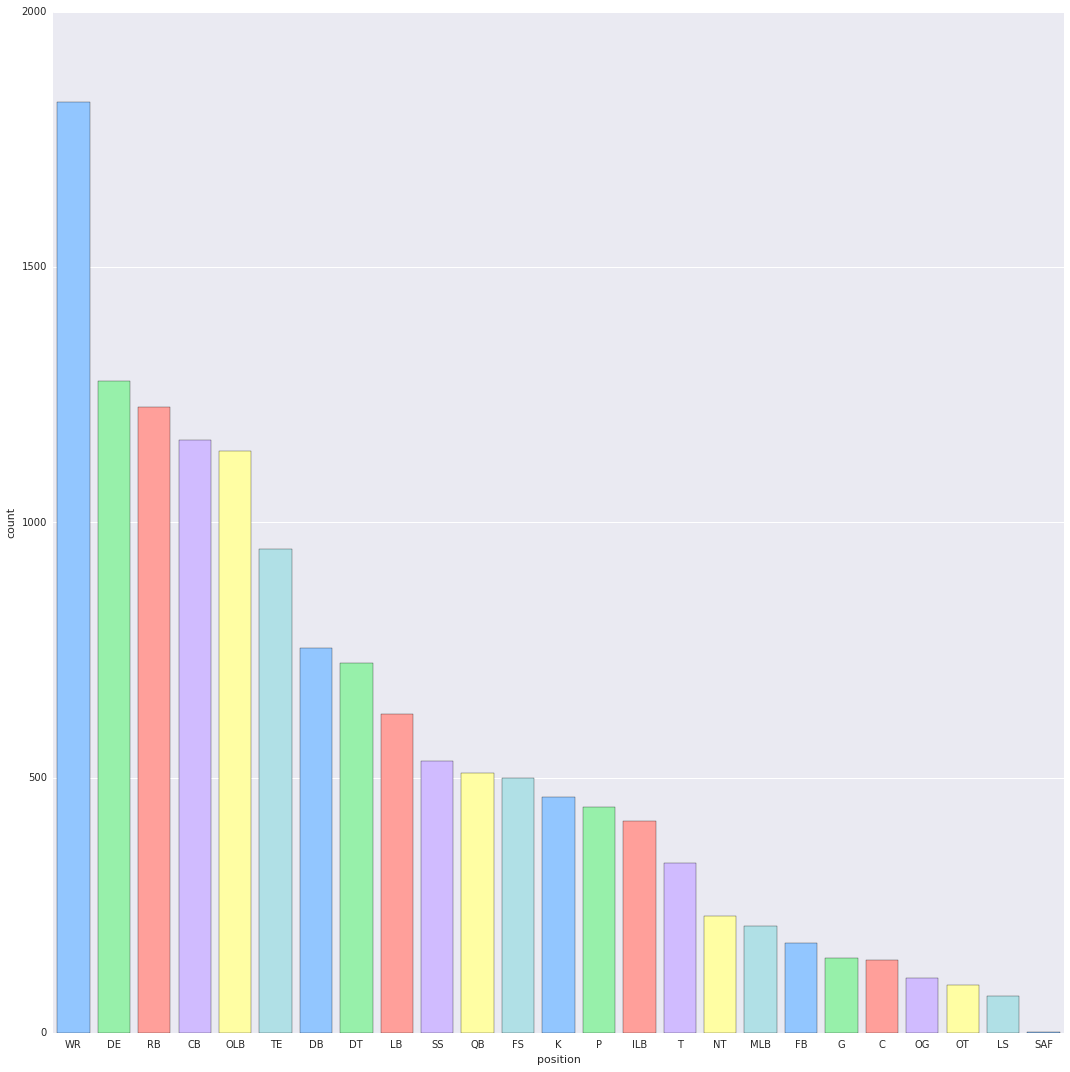

In [13]:
no_nans = raw_df[raw_df[raw_df.fanduel_points< 3].notnull()]

no_nans = raw_df[raw_df.position != 'UNK'] #remove Unknowns from this dataframe

no_nans.groupby('position').size()

bad_performances = pd.DataFrame({'count' : no_nans.groupby('position').size()}).reset_index()

bad_performances = bad_performances.sort(['count'], ascending=[0])

print bad_performances

g = sns.factorplot("position", "count",
                    data=bad_performances, kind="bar",
                    size=15, palette="pastel", dropna=True, x_order=bad_performances.position.values)


In [14]:
#Let's look at an individual player
raw_df[(raw_df.full_name =='Tom Brady') & (raw_df.week == 2)]

,player_id,full_name,position,team,week,fanduel_points,opponent,home_team,away_team,prev_fanduel_points,...,prev_rushing_att,mean_rushing_att,prev_rushing_loss,mean_rushing_loss,prev_rushing_loss_yds,mean_rushing_loss_yds,prev_rushing_tds,mean_rushing_tds,prev_rushing_yds,mean_rushing_yds
1149,00-0019596,Tom Brady,QB,NE,2,28.24,BUF,BUF,NE,27.62,...,3,3,0,0,0,0,0,0,1,1


In [15]:
#All positions are not created equal -- some score many more points than others
raw_df[raw_df[raw_df.fanduel_points> 1].notnull()].groupby('position')['fanduel_points'].sum()

position
CB         6.00
DB         9.00
FB       363.10
G          1.50
K       3506.12
NT         6.10
OT         3.60
P          5.80
QB      7861.24
RB      8849.84
T          1.20
TE      4656.70
UNK     5782.82
WR     12457.80
Name: fanduel_points, dtype: float64

In [19]:
#Since a few positions seem to score all the points, let's zoom in on those
plot_order = ['TE', 'WR', 'RB', 
              'K', 'QB']
top_positions_only = raw_df[raw_df.position.isin(plot_order)]
top_positions_only.groupby('position')['fanduel_points'].mean()

position
K      7.623636
QB    15.448330
RB     7.244731
TE     4.967405
WR     6.854775
Name: fanduel_points, dtype: float64

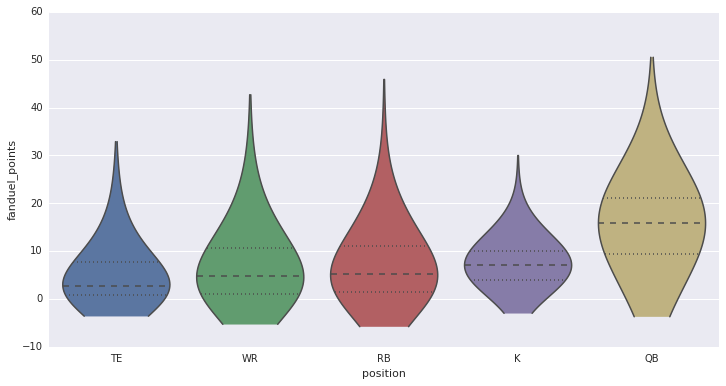

In [20]:
# Violin plots are a nice alternative to boxplots that also show interesting detail about
# the shape of the distribution
nonnull_subset = top_positions_only['fanduel_points'].notnull()
plt.figure(figsize=(12, 6))
sns.violinplot(top_positions_only['fanduel_points'][nonnull_subset], 
               top_positions_only['position'][nonnull_subset], 
               inner='box',
               order=plot_order,
               bw=1,
               size=16)

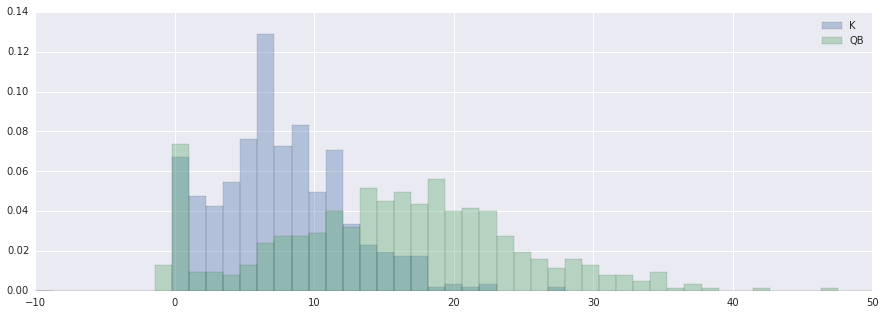

In [18]:
# QB's and kickers score the most points. Let's look into those using a Histogram
qb_k = ['K', 'QB']
qb_k_data = raw_df[raw_df.position.isin(qb_k)]
groups = qb_k_data.groupby('position').groups

pylab.figure(figsize=(15,5))
for key, row_ids in groups.iteritems():
    pylab.hist(qb_k_data['fanduel_points'][row_ids].values,
               normed=True,
               bins=np.linspace(-10, 50, 50),
               alpha=0.35,
               label=str(key))
pylab.legend()

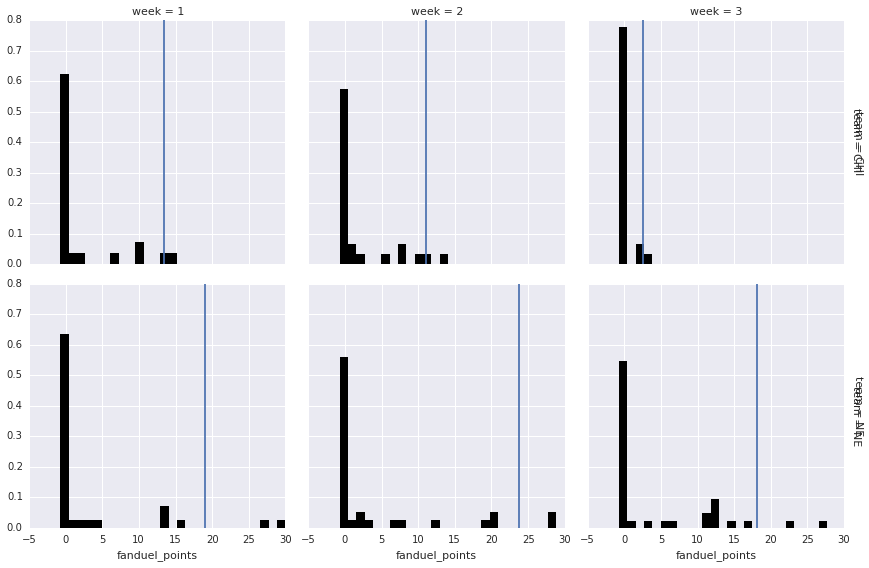

In [19]:
# We can use a Facetgrid to analyze teams

def vertical_mean_line(x, **kwargs):
    plt.axvline(np.percentile(x, 95), **kwargs)
    
teams = ['NE', 'CHI']
team_data = raw_df[raw_df.team.isin(teams)]
team_data = team_data[team_data.week < 4]

g = sns.FacetGrid(team_data, row="team", col="week", 
                  margin_titles=True, dropna=True, size=4)
bins = np.linspace(-3, 30, 30)
g.map(plt.hist, "fanduel_points", color="black", bins=bins, 
      lw=0, normed=True)
g.map(vertical_mean_line, 'fanduel_points')


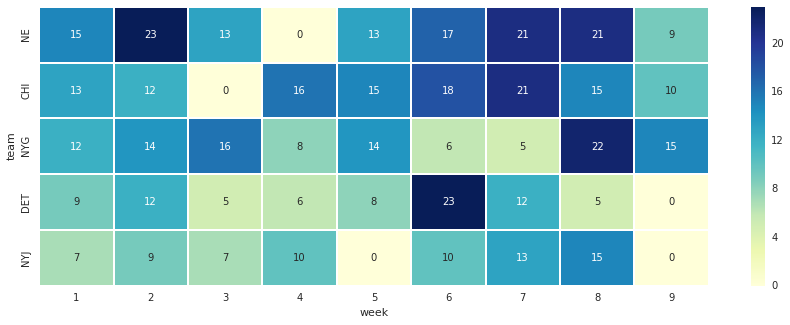

In [20]:
# We can use a Heatmap to analyze teams kicker and qb performance
teams = ['NE', 'CHI', 'NYG', 'DET', 'NYJ']
team_data = qb_k_data[qb_k_data.team.isin(teams)]
team_data = team_data[team_data.week < 10]
ptable = pd.pivot_table(
    team_data, 
    values='fanduel_points', 
    index=["team"], 
    columns='week')
reorder_teams = ptable.reindex(teams).fillna(0)
pylab.figure(figsize=(15,5))
sns.heatmap(reorder_teams.astype(int), annot=True, fmt="d", cmap="YlGnBu")

# Zero values are bye weeks



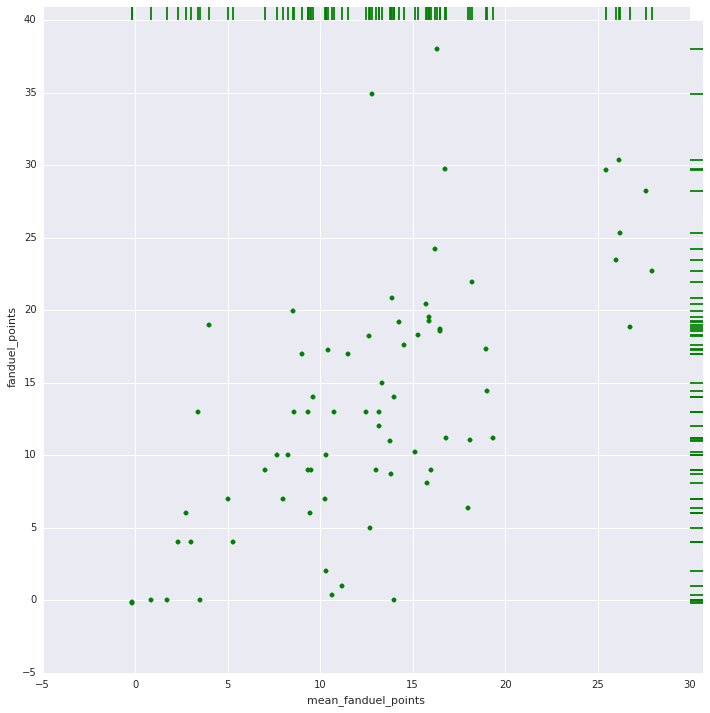

In [21]:
# Are previous week's points a good predictor of current week's points? 
# Let's consider only kicker and QB data for these teams
# We have to exclude week 1 here since there is no previous weeks' mean
team_data_no_week_1 = team_data[team_data.week > 1]
grid = sns.JointGrid(team_data_no_week_1['mean_fanduel_points'], 
              team_data_no_week_1['fanduel_points'],space=0, size=10, ratio=50)
grid.plot_joint(plt.scatter, color="g")
grid.plot_marginals(sns.rugplot, height=1, color="g")

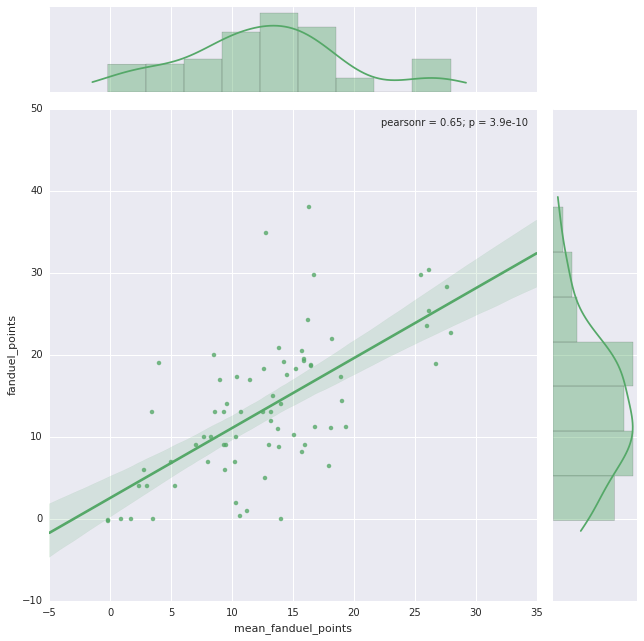

In [22]:
# We can use jointplot (uses JointGrid internally) to get a quick regression line for this
sns.jointplot('mean_fanduel_points', 'fanduel_points', data=team_data_no_week_1, 
              kind="reg", color=sns.color_palette()[1], size=9)

In [23]:
# QB's are significantly more important than any other position. Let's dig in
qb_df = raw_df[raw_df.position == 'QB']

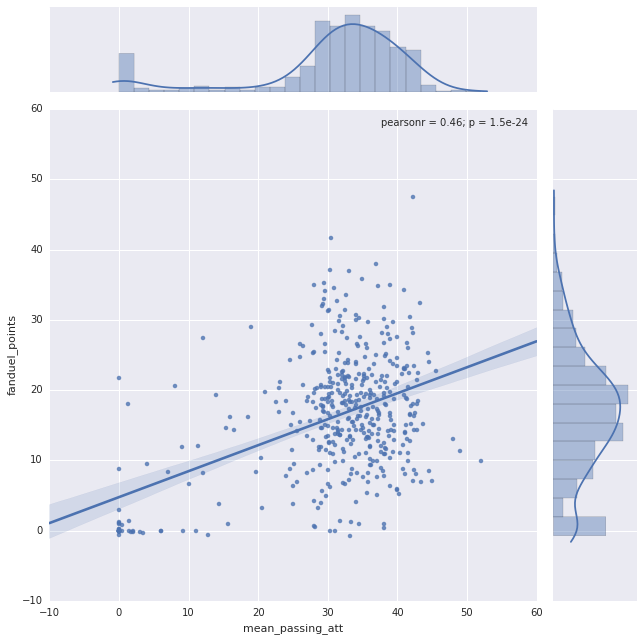

In [24]:
# Passing attempts from previous weeks --- is there a trend with next week's performance? No
sns.jointplot(qb_df['mean_passing_att'], 
              qb_df['fanduel_points'], kind="reg", size=9)

#Modeling

## Scikit-Learn

# Widely used machine learning package

- Classification Models
- Regression Models
- Clustering techniques
- Dimensionality Reduction
- Preprocessing
- ...

##Experimental Design



##Build a model that is useful

Can only build model on data that has a known output

If we had missing values in our target (output variable) we would want to be careful



## Avoiding overfitting
- Need to keep data we train on from data we validate on
- Otherwise the results will be overly optimistic
- ... and ultimately, the model will perform poorly on new data

### We will setup our training and test set in a bit

In [25]:
import sklearn


In [21]:
# Let's prep for modeling
exclude_week_1 = top_positions_only[top_positions_only.week > 1]

model_data = pd.DataFrame.copy(exclude_week_1)

model_data = model_data[model_data.fanduel_points > 0]

print np.isnan(model_data['fanduel_points']).sum()

# Let's cut our target out so we don't train on it
target = model_data.pop('fanduel_points')

# We don't need player id's --- let's throw this away
throw_away = model_data.pop('player_id')

import sklearn.cross_validation

(train_data, 
 test_data, 
 train_target, 
 test_target) = sklearn.cross_validation.train_test_split(
    model_data, target, test_size=0.2, random_state=1337
)

0


####Today we will use simple train/test split

####Recommend using multiple cross-validation folds

##Variable Preprocessing

###Most statistical models require numeric encoding

###Many will choke on missing values

###Need some massaging before fitting a statistical learner

In [27]:
#Handle categorical vars
import sklearn.preprocessing
import sklearn.feature_extraction
from sklearn.feature_extraction import DictVectorizer
encoder = DictVectorizer(sparse=False)

#Let's do one-hot encoding in sklearn using DictVectorizer
categorical_vars = ['full_name', 'position', 'team', 'week', 'opponent', 'home_team', 'away_team']
vardata = train_data[categorical_vars].fillna('MISSING')
encoder.fit(vardata.to_dict(orient='records'))
train_catdata = encoder.transform(vardata.to_dict(orient='records'))

test_vardata = test_data[categorical_vars].fillna('MISSING')
test_catdata = encoder.transform(
    test_vardata[categorical_vars].to_dict(orient='records'))

pd.DataFrame(train_catdata).describe()


,0,1,2,3,4,5,6,7,8,9,...,560,561,562,563,564,565,566,567,568,569
count,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,...,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000,3160.000000
mean,0.034810,0.028797,0.032278,0.033861,0.028165,0.035443,0.029747,0.029430,0.037975,0.030696,...,0.037658,0.039241,0.029114,0.033544,0.031962,0.029747,0.028797,0.044304,0.037975,9.587658
std,0.183328,0.167263,0.176767,0.180899,0.165469,0.184926,0.169915,0.169036,0.191165,0.172521,...,0.190398,0.194197,0.168152,0.180081,0.175927,0.169915,0.167263,0.205802,0.191165,4.691149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000


##Missing values in numeric columns

###We will impute with the median value

In [28]:
#Handle numeric vars
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

numeric_vars = list(set(train_data.columns.tolist()) - set(categorical_vars))

numdata = train_data[numeric_vars]
imputer.fit(numdata)

train_numdata = imputer.transform(numdata)
test_numdata = imputer.transform(test_data[numeric_vars])


In [29]:
train_this = np.hstack([train_numdata, train_catdata])
test_this = np.hstack([test_numdata, test_catdata])


In [30]:
import sklearn
from sklearn.linear_model import LinearRegression

print np.any(isnan(train_numdata))
print np.all(np.isfinite(train_numdata))

lr = LinearRegression(fit_intercept=False)
lr.fit(train_numdata, train_target)

lr_predictions = pd.Series(lr.predict(test_numdata),
                           name='Linear Regression')

False
True


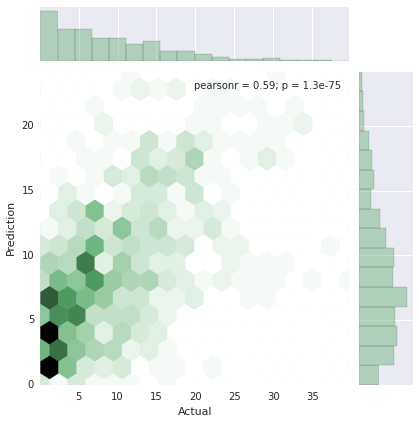

In [31]:

p_df = pd.DataFrame({'Prediction': lr_predictions,
                     'Actual': test_target.values})

pylab.figure(figsize=(10, 10))
sns.jointplot('Actual', 'Prediction', data=p_df, 
              kind="hex", color=sns.color_palette()[1])
#Let's take a look at our residuals using using just the categorical vars

In [32]:
from sklearn import metrics

test_metrics = {
    'Explained Variance': metrics.explained_variance_score,
    'MAE': metrics.mean_absolute_error,
    'MSE': metrics.mean_squared_error,
    'MedAE': metrics.median_absolute_error,
    'R2': metrics.r2_score
}
def metrics_report(*predictions):
    records = []
    for prediction_set in predictions:
        record = {'name': prediction_set.name}
        for metric_name in sorted(test_metrics.keys()):
            metric_func = test_metrics[metric_name]
            record[metric_name] = metric_func(test_target, prediction_set)
        records.append(record)
    frame = pd.DataFrame.from_records(records).set_index('name')
    return frame
        
metrics_report(lr_predictions)

,Explained Variance,MAE,MSE,MedAE,R2
name,,,,,
Linear Regression,0.335165,4.444197,36.212686,3.399439,0.331252


In [33]:
# We need to add reference models to track a baseline performance that we can compare our other models to
mean_response = np.mean(train_target)
mean_predictions = pd.Series(np.ones_like(test_target) * mean_response,
                             name='Mean Response')

median_response = np.median(train_target)
median_predictions = pd.Series(np.ones_like(test_target) * median_response,
                               name='Median Response')

metrics_report(mean_predictions, 
               median_predictions, 
               lr_predictions)

,Explained Variance,MAE,MSE,MedAE,R2
name,,,,,
Mean Response,0.000000,5.916924,54.151808,5.627266,-0.000034
Median Response,0.000000,5.746785,57.647159,4.800000,-0.064583
Linear Regression,0.335165,4.444197,36.212686,3.399439,0.331252


In [34]:
#Time for ElasticNet

from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import ElasticNet

estimator = ElasticNet()

parameters = {
    'alpha': np.linspace(0.1, 2, 10, endpoint=True),
    'l1_ratio': np.linspace(0, 1, 10, endpoint=True)
}

enet = GridSearchCV(estimator, parameters)
enet.fit(train_numdata, train_target)


GridSearchCV(cv=None, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'alpha': array([ 0.1    ,  0.31111,  0.52222,  0.73333,  0.94444,  1.15556,
        1.36667,  1.57778,  1.78889,  2.     ]), 'l1_ratio': array([ 0.     ,  0.11111,  0.22222,  0.33333,  0.44444,  0.55556,
        0.66667,  0.77778,  0.88889,  1.     ])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [35]:
print(enet.best_params_, enet.best_score_)
print()
print("Grid scores on development set:")
print()
for params, mean_score, scores in enet.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))
print()

({'alpha': 0.52222222222222225, 'l1_ratio': 0.55555555555555558}, 0.27276120897428852)
()
Grid scores on development set:
()
0.270 (+/-0.061) for {'alpha': 0.10000000000000001, 'l1_ratio': 0.0}
0.270 (+/-0.061) for {'alpha': 0.10000000000000001, 'l1_ratio': 0.1111111111111111}
0.270 (+/-0.060) for {'alpha': 0.10000000000000001, 'l1_ratio': 0.22222222222222221}
0.270 (+/-0.060) for {'alpha': 0.10000000000000001, 'l1_ratio': 0.33333333333333331}
0.271 (+/-0.059) for {'alpha': 0.10000000000000001, 'l1_ratio': 0.44444444444444442}
0.271 (+/-0.059) for {'alpha': 0.10000000000000001, 'l1_ratio': 0.55555555555555558}
0.271 (+/-0.059) for {'alpha': 0.10000000000000001, 'l1_ratio': 0.66666666666666663}
0.271 (+/-0.059) for {'alpha': 0.10000000000000001, 'l1_ratio': 0.77777777777777768}
0.271 (+/-0.059) for {'alpha': 0.10000000000000001, 'l1_ratio': 0.88888888888888884}
0.271 (+/-0.058) for {'alpha': 0.10000000000000001, 'l1_ratio': 1.0}
0.271 (+/-0.061) for {'alpha': 0.31111111111111112, 'l1_ra

In [36]:
estimator2 = ElasticNet()

parameters2 = {
    'alpha': np.linspace(0.4, 0.6, 10, endpoint=True),
    'l1_ratio': np.linspace(0.4, 0.6, 10, endpoint=True)
}

enet2 = GridSearchCV(estimator2, parameters2)
enet2.fit(train_numdata, train_target)

GridSearchCV(cv=None, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'alpha': array([ 0.4    ,  0.42222,  0.44444,  0.46667,  0.48889,  0.51111,
        0.53333,  0.55556,  0.57778,  0.6    ]), 'l1_ratio': array([ 0.4    ,  0.42222,  0.44444,  0.46667,  0.48889,  0.51111,
        0.53333,  0.55556,  0.57778,  0.6    ])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [46]:
print(enet2.best_params_, enet2.best_score_)
print()
print("Grid scores on development set:")
print()
for params, mean_score, scores in enet2.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))
print()

({'alpha': 0.59999999999999998, 'l1_ratio': 0.48888888888888887}, 0.27276653788293181)
()
Grid scores on development set:
()
0.272 (+/-0.058) for {'alpha': 0.40000000000000002, 'l1_ratio': 0.40000000000000002}
0.272 (+/-0.058) for {'alpha': 0.40000000000000002, 'l1_ratio': 0.42222222222222222}
0.273 (+/-0.058) for {'alpha': 0.40000000000000002, 'l1_ratio': 0.44444444444444448}
0.273 (+/-0.058) for {'alpha': 0.40000000000000002, 'l1_ratio': 0.46666666666666667}
0.273 (+/-0.057) for {'alpha': 0.40000000000000002, 'l1_ratio': 0.48888888888888887}
0.273 (+/-0.057) for {'alpha': 0.40000000000000002, 'l1_ratio': 0.51111111111111107}
0.273 (+/-0.057) for {'alpha': 0.40000000000000002, 'l1_ratio': 0.53333333333333333}
0.273 (+/-0.057) for {'alpha': 0.40000000000000002, 'l1_ratio': 0.55555555555555558}
0.273 (+/-0.057) for {'alpha': 0.40000000000000002, 'l1_ratio': 0.57777777777777772}
0.273 (+/-0.057) for {'alpha': 0.40000000000000002, 'l1_ratio': 0.59999999999999998}
0.272 (+/-0.058) for {'al

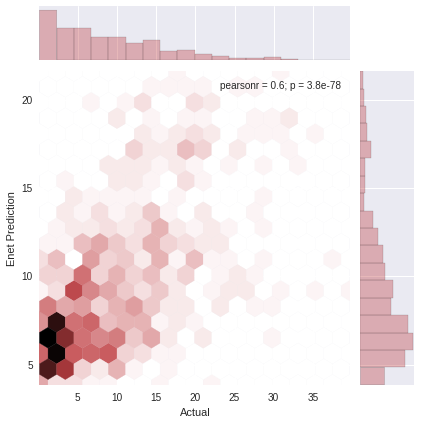

In [47]:
enet_predictions = pd.Series(enet.predict(test_numdata),
                             name='Elastic Net')
p_df = pd.DataFrame({'Enet Prediction': enet_predictions,
                     'Actual': test_target.values})

pylab.figure(figsize=(10, 10))
sns.jointplot('Actual', 'Enet Prediction', data=p_df, kind="hex",
              color=sns.color_palette()[2])

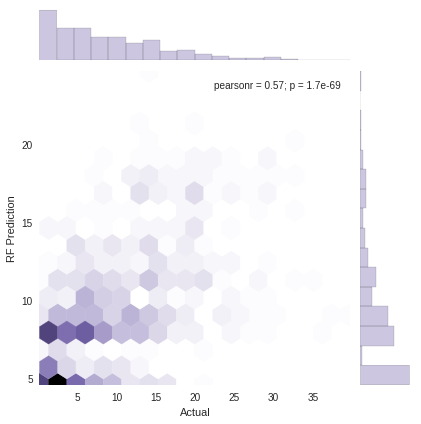

In [239]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()

parameters = {'n_estimators': (5, 10, 15, 20, 25, 30, 35),
              'max_depth': (3, 5, 7, 9, 11),
             }
rfr = GridSearchCV(estimator, parameters, n_jobs=3)
rfr.fit(train_this, train_target)

rfr_predictions = pd.Series(rfr.predict(test_this),
                            name='Random Forest')

p_df = pd.DataFrame({'RF Prediction': rfr_predictions,
                     'Actual': test_target.values})

pylab.figure(figsize=(10, 10))
sns.jointplot('Actual', 'RF Prediction', data=p_df, kind="hex",
              color=sns.color_palette()[3])


In [240]:
metrics_report(mean_predictions,
               median_predictions,
               lr_predictions,
               enet_predictions,
               rfr_predictions)

,Explained Variance,MAE,MSE,MedAE,R2
name,,,,,
Mean Response,0.000000,5.916924,54.151808,5.627266,-0.000034
Median Response,0.000000,5.746785,57.647159,4.800000,-0.064583
Linear Regression,0.335165,4.444201,36.212719,3.399445,0.331251
Elastic Net,0.354220,4.635088,34.990091,4.025681,0.353830
Random Forest,0.323904,4.656359,36.613345,3.818018,0.323853


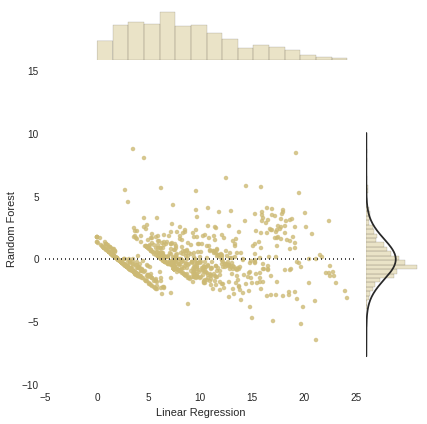

In [241]:

lr_diffs = lr_predictions - test_target
lr_diffs.name = 'LinearRegression Error'
rfr_diffs = rfr_predictions - test_target
rfr_diffs.name = 'RandomForest Error'

sns.jointplot(lr_predictions, rfr_predictions, kind='resid', color=sns.color_palette()[4])

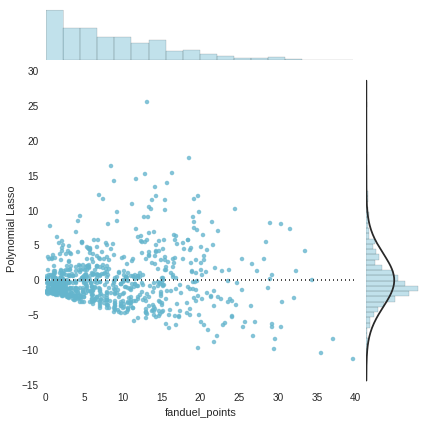

In [242]:

from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2

model = make_pipeline(PolynomialFeatures(degree), Lasso())
model.fit(train_numdata, train_target)

poly_preds = pd.Series(model.predict(test_numdata),
                       name='Polynomial Lasso',
                       index=test_target.index)


sns.jointplot(test_target, 
              poly_preds,
              kind='resid',
              color=sns.color_palette()[5])   

In [243]:
metrics_report(mean_predictions,
               median_predictions,
               lr_predictions,
               enet_predictions,
               rfr_predictions,
               poly_preds)

,Explained Variance,MAE,MSE,MedAE,R2
name,,,,,
Mean Response,0.000000,5.916924,54.151808,5.627266,-0.000034
Median Response,0.000000,5.746785,57.647159,4.800000,-0.064583
Linear Regression,0.335165,4.444201,36.212719,3.399445,0.331251
Elastic Net,0.354220,4.635088,34.990091,4.025681,0.353830
Random Forest,0.323904,4.656359,36.613345,3.818018,0.323853
Polynomial Lasso,0.275439,4.810340,39.327519,4.009546,0.273730
